In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score


df=pd.read_csv('winequality-red.csv')


In [23]:
df_n=(df-df.mean())/df.std()

x=df_n.iloc[:,:11]
ones=np.ones([x.shape[0],1])
x=np.concatenate((ones,x),axis=1)

y=df_n.iloc[:,11].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 69)

w=np.zeros(12)

alpha=0.1
epoch=100

In [24]:
def costfn(x,y,w):
    sigma=np.sum(np.power(((x @ w)-y),2))
    return sigma/(2*len(x))
costfn(x_train,y_train,w)

0.47246782603838217

In [25]:
def gradient_descent(x,y,w,epoch,alpha):
    cost=np.zeros(epoch)
    for i in range(epoch):
        d=(x.T)*(x @ w - y)
        w=w-(alpha/len(x))*np.sum(d,axis=1)
        cost[i]=costfn(x,y,w)
    return w,cost

g,cost=gradient_descent(x_train,y_train,w,epoch,alpha)
print(g)

finalCost = costfn(x,y,g)
print(finalCost)

[-0.01937712  0.05574684 -0.22382067 -0.04199808  0.04042892 -0.09861986
  0.04953233 -0.14465526 -0.0732391  -0.07465907  0.20218477  0.3266351 ]
0.3204925403695667


Text(0.5, 1.0, 'Error vs. Training Epoch')

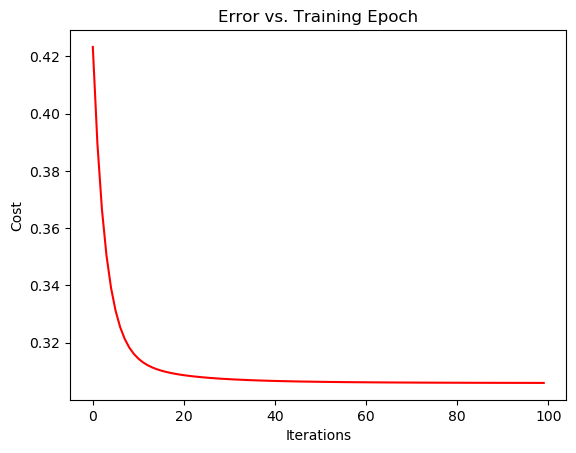

In [26]:
fig , ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

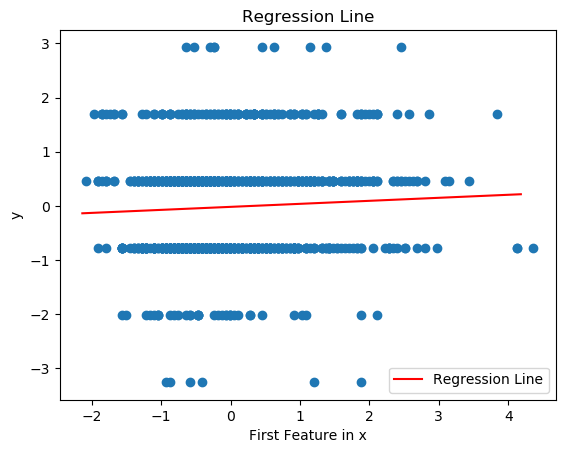

In [30]:
x_values = np.linspace(np.min(x_test[:,1]), np.max(x_test[:,1]), 100)
y_values = g[0] + g[1]*x_values

plt.scatter(x_train[:,1],y_train)
plt.plot(x_values, y_values, color='r', label='Regression Line')
plt.xlabel('First Feature in x')
plt.ylabel('y')
plt.title('Regression Line')
plt.legend()
plt.show()

In [29]:
y_pred=np.dot(x_test,g)
r2=r2_score(y_test, y_pred)
print("Accuracy of the model is:",r2*100,"%")

Accuracy of the model is: 36.953653568813735 %
